## Bike Sharing Demand Machine Learning Project
#### **Kelompok 4**
- Andra Rizky Ramadhan : Data Wrangling and Manhattan Distance
- Fadel Achmad Daniswara (Project Leader) : Data Pre Processing, EDA, Feature Selection and Label Encoding
- Haris Pratama Wibowo : Finding Dataset and Minkwoski Distance
- Saffana Hadaina Sadida : Flowchart and LaTex
- Tania Kayla Syafina : Euclidian Distance, Train Test Split, and Evaluation Metric

# Mathematical Model

$$
y = 1248.3209 + 524.7225 \cdot x_{1} + 2023.9975 \cdot x_{2} - 38.4447 \cdot x_{3} - 391.5508 \cdot x_{4} \\+ 72.9370 \cdot x_{5} + 160.8049 \cdot x_{6} - 632.8563 \cdot x_{7} + 2097.2478 \cdot x_{8} \\ + 3488.0422 \cdot x_{9} - 865.4394 \cdot x_{10} - 2080.5404 \cdot x_{11}
$$

Dengan:
$
\
\begin{align}
x_1 & = \text{season} \\
x_2 & = \text{year (yr)} \\
x_3 & = \text{month (mnth)} \\
x_4 & = \text{holiday} \\
x_5 & = \text{weekday} \\
x_6 & = \text{working day} \\
x_7 & = \text{weather situation (weathersit)} \\
x_8 & = \text{temperature (temp)} \\
x_9 & = \text{feels-like temperature (atemp)} \\
x_{10} & = \text{humidity (hum)} \\
x_{11} & = \text{wind speed (windspeed)}
\end{align}
$


### Flow Chart

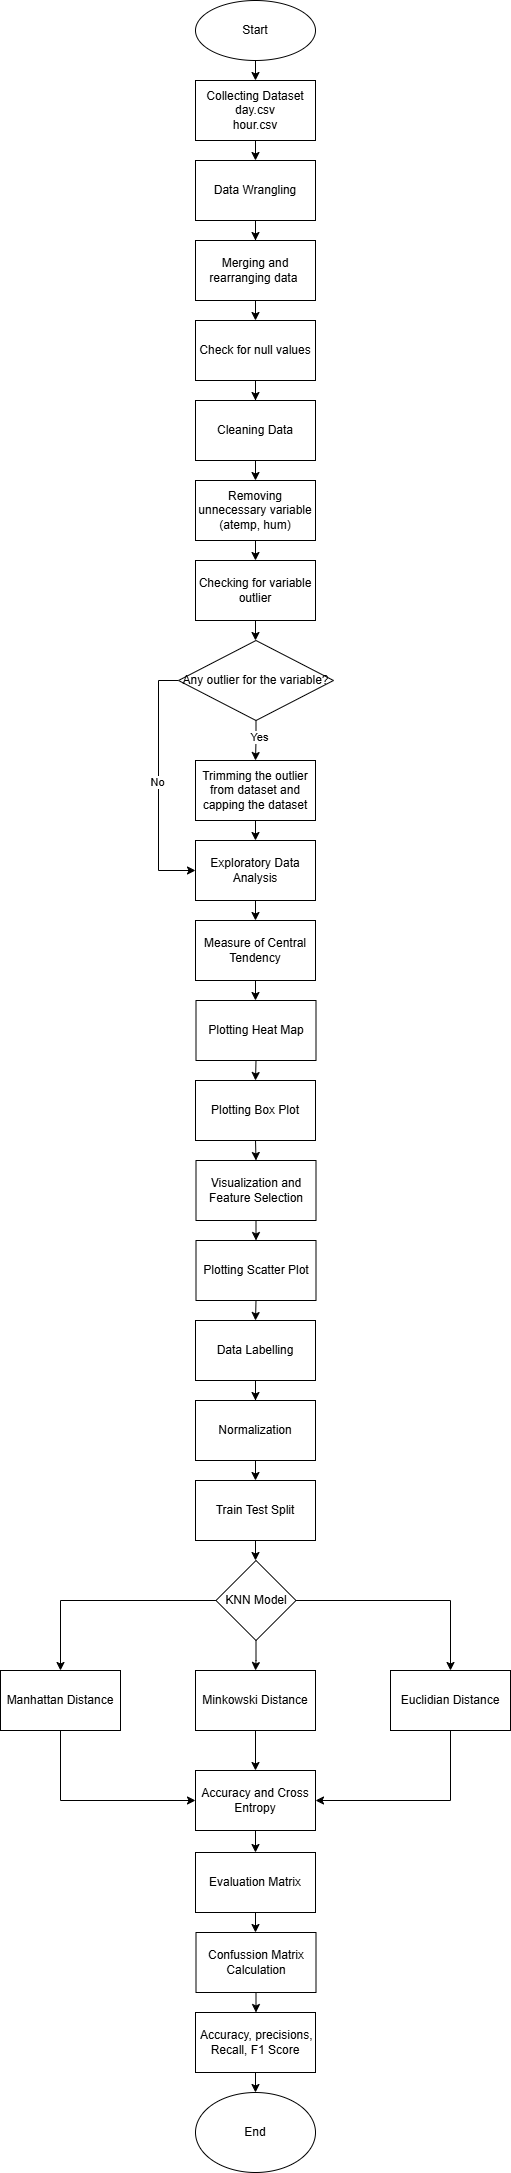

## Import Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

## Data Wrangling

### Gathering Data
- Proses gathering data disini terdapat proses merging antara dua dataset, yaitu day.csv dan hour.csv. Hasil gabungan kedua dataset ini akan menghasilkan dataset baru, yaitu bike_sharing_df dengan kolom-kolom yang sama, namun terdapat kolom "hr" yang hanya ada di dataset hour.csv.

- Disini juga dilakukan proses re-arrangement dataset yang berfungsi untuk mengubah urutan kolom "hr" yang tadinya berada pada posisi paling belakang menjadi di sebelah kanan kolom "dteday".

In [2]:
# Gathering two dataset
bike_per_day_df = pd.read_csv("day.csv")
bike_per_hour_df = pd.read_csv("hour.csv")

# print(f"Dataset Bike per Day\n {bike_per_day_df.head()}\n")
# print(f"Dataset Bike per Hour\n {bike_per_hour_df.head()}")

# Merging two dataset
bike_sharing_df = pd.merge(
    left=bike_per_day_df,
    right=bike_per_hour_df[["dteday","hr"]],
    how="left",
    on="dteday"
)

# Re-arrange Dataset
columns = bike_sharing_df.columns.tolist()
columns.insert(2, columns.pop(columns.index("hr")))
bike_sharing_df = bike_sharing_df[columns]

print(f"Bike Sharing Dataset \n {bike_sharing_df.head()}")

Bike Sharing Dataset 
    instant      dteday  hr  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01   0       1   0     1        0        6           0   
1        1  2011-01-01   1       1   0     1        0        6           0   
2        1  2011-01-01   2       1   0     1        0        6           0   
3        1  2011-01-01   3       1   0     1        0        6           0   
4        1  2011-01-01   4       1   0     1        0        6           0   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.344167  0.363625  0.805833   0.160446     331         654   
2           2  0.344167  0.363625  0.805833   0.160446     331         654   
3           2  0.344167  0.363625  0.805833   0.160446     331         654   
4           2  0.344167  0.363625  0.805833   0.160446     331         654   

   cnt  
0  985  
1  985  
2  985  
3  

**Insight:**
- Dataset bike_per_day_df dan bike_per_hour_df memiliki kolom yang sama, yang membedakan hanyalah kolom hour pada bike_per_hour_df.
- Melakukan proses merging pada kedua dataset tersebut, sehingga hanya akan ada satu dataset yaitu bike_sharing_df.
- Melakukan proses re-arrange dari dataset gabungan yang baru. Hal ini dilakukan karena kolom "hr" berada di paling belakang. Kolom "hr" dipindahkan ke samping kanan "dteday"

### Assessing Data

- Mengecek dataset bike_sharing_df jika terdapat nilai yang duplikat atau nilai null.

In [3]:
# Checking Null Values
print(f"Null Values from Dataset \n{bike_sharing_df.isnull().sum()}\n")

# Checking Duplicated Values
print(f"Duplicated Values from Dataset : {bike_sharing_df.duplicated().sum()}\n")

Null Values from Dataset 
instant       0
dteday        0
hr            0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Duplicated Values from Dataset : 0



### Cleaning Data

- Mengecek sekaligus memperbaiki jika terdapat format date and time yang salah.

In [4]:
# Fix the Date and Time Format
bike_sharing_df["dteday"] = pd.to_datetime(bike_sharing_df["dteday"], format="%Y-%m-%d")
incorrectDate = bike_sharing_df[bike_sharing_df["dteday"].isna()]
print(incorrectDate)


Empty DataFrame
Columns: [instant, dteday, hr, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


- Menghapus kolom yang tidak sesuai dengan pertanyaan bisnis diatas. Kolom-kolom ini tidak berpengaruh signifikan terhadap analisis.

In [5]:
# Drop Unused Column
bike_sharing_df.drop(columns=["atemp", "hum"], inplace=True)
print(bike_sharing_df.head())

   instant     dteday  hr  season  yr  mnth  holiday  weekday  workingday  \
0        1 2011-01-01   0       1   0     1        0        6           0   
1        1 2011-01-01   1       1   0     1        0        6           0   
2        1 2011-01-01   2       1   0     1        0        6           0   
3        1 2011-01-01   3       1   0     1        0        6           0   
4        1 2011-01-01   4       1   0     1        0        6           0   

   weathersit      temp  windspeed  casual  registered  cnt  
0           2  0.344167   0.160446     331         654  985  
1           2  0.344167   0.160446     331         654  985  
2           2  0.344167   0.160446     331         654  985  
3           2  0.344167   0.160446     331         654  985  
4           2  0.344167   0.160446     331         654  985  


- Mengecek outlier pada kolom casual

In [6]:
# Drop Outlier for casual columns
Q1 = bike_sharing_df["windspeed"].quantile(0.25)
Q3 = bike_sharing_df["windspeed"].quantile(0.75)

IQR = Q3 - Q1
upperBound = Q3 + 1.5 * IQR
lowerBound = Q1 - 1.5 * IQR

upperCondition = bike_sharing_df["windspeed"] > upperBound
lowerCondition = bike_sharing_df["windspeed"] < lowerBound

- Trimming dataset yang telah di cek nilai outliernya

In [7]:
# Trimming Dataset
new_bike_sharing_df = bike_sharing_df[bike_sharing_df["windspeed"] < upperBound]
new_bike_sharing_df.shape

(17067, 15)

- Melakukan proses capping pada dataset yang baru, sehingga dataset yang baru tidak memiliki outlier pada kolom "casual"

In [8]:
# Capping Dataset
new_bike_sharing_df_cap = bike_sharing_df.copy()
new_bike_sharing_df_cap["windspeed"] = np.where(
    new_bike_sharing_df_cap["windspeed"] > upperBound,
    upperBound,
    np.where(
        new_bike_sharing_df_cap["windspeed"] < lowerBound,
        lowerBound,
        new_bike_sharing_df_cap["windspeed"]
    )
)

**Insight:**
- Tidak terdapat format date and time yang tidak sesuai.
- Kolom "atemp" dan "hum" dihapus karena tidak sesuai dengan pertanyaan bisnis dan tidak berpengaruh signifikan terhadap analisis.
- Terdapat outlier pada kolom "casual", sehingga outlier pada kolom tersebut perlu di hapus.

## Exploratory Data Analysis (EDA)

### Measure of Central Tendency
- Mengecek rata-rata dan median dari seluruh kolom pada dataset bike_sharing_df. Hal ini dilakukan untuk melihat seberapa jauh perbedaan antara nilai rata-rata dengan mediannya. Hal ini juga dapat menjadi acuan apakah dari setiap kolom terdapat outlier yang disebabkan jauhnya nilai rata-rata dengan mediannya.

In [9]:
# Measure of Central Tendency
print(new_bike_sharing_df_cap.describe(include="all"))

            instant                         dteday            hr  \
count  17379.000000                          17379  17379.000000   
mean     367.172622  2012-01-02 04:08:34.552045568     11.546752   
min        1.000000            2011-01-01 00:00:00      0.000000   
25%      185.000000            2011-07-04 00:00:00      6.000000   
50%      367.000000            2012-01-02 00:00:00     12.000000   
75%      549.000000            2012-07-02 00:00:00     18.000000   
max      731.000000            2012-12-31 00:00:00     23.000000   
std      210.072051                            NaN      6.914405   

             season            yr          mnth       holiday       weekday  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       2.501640      0.502561      6.537775      0.028770      3.003683   
min        1.000000      0.000000      1.000000      0.000000      0.000000   
25%        2.000000      0.000000      4.000000      0.000000      1.00

**Insight:**
- Dari hasil analisis mean dan median diatas, tidak terdapat perbedaan yang signifikan antara mean dan median dari setiap kolom.
- Pada kolom casual, mean dan median terlihat cukup berbeda. Oleh karena itu, saya akan membuat box plot agar bisa melihat apakah terdapat outlier pada kolom casual.

### Correlation Analysis
Membuat heatmap untuk melihat korelasi antar variabel. Dari heatmap ini, dapat dicari fitur serta nilai output yang akan digunakan untuk pembuatan model KNN.

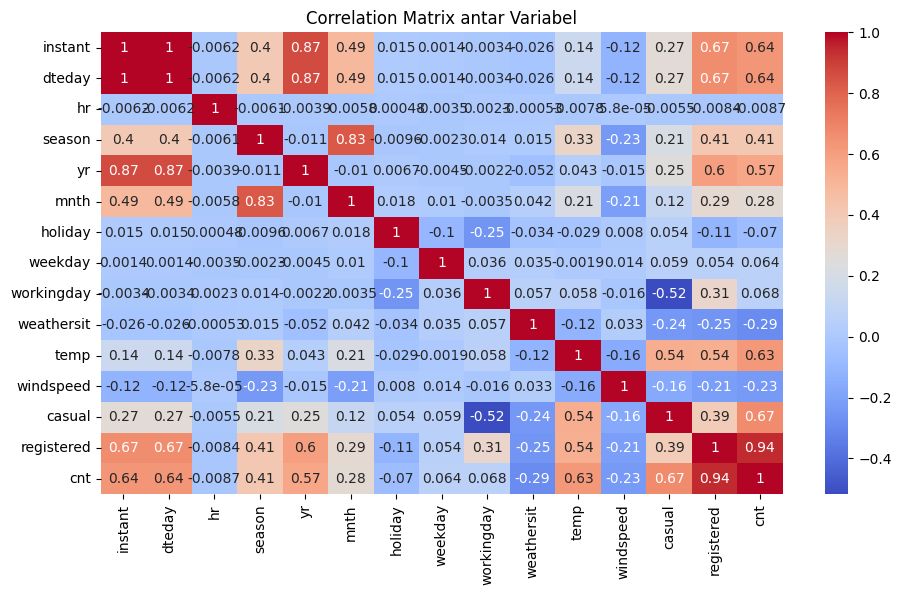

In [10]:
plt.figure(figsize=(11,6))
sns.heatmap(new_bike_sharing_df_cap.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix antar Variabel")
plt.show()

**Insight**
- Variabel "cnt" akan dijadikan sebagai Y atau variabel outputnya.
- Variabel "temp" dan "windspeed" akan dijadikan sebagai fitur atau variabel yang mempengaruhi (X) nilai variabel outputnya.

### Box Plot
Melihat persebaran data dengan menggunakan box plot sekaligus melihat apakah masih terdapat outlier di variabel-variabel yang akan digunakan pada model Machine Learning.

Text(0, 0.5, 'Frequency')

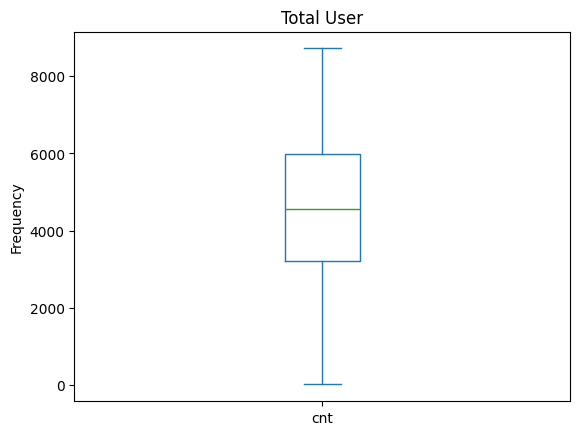

In [11]:
new_bike_sharing_df_cap["cnt"].plot.box()
plt.title("Total User")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

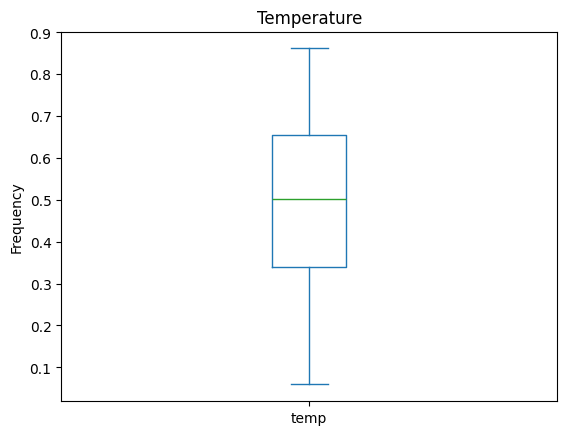

In [12]:
new_bike_sharing_df_cap["temp"].plot.box()
plt.title("Temperature")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

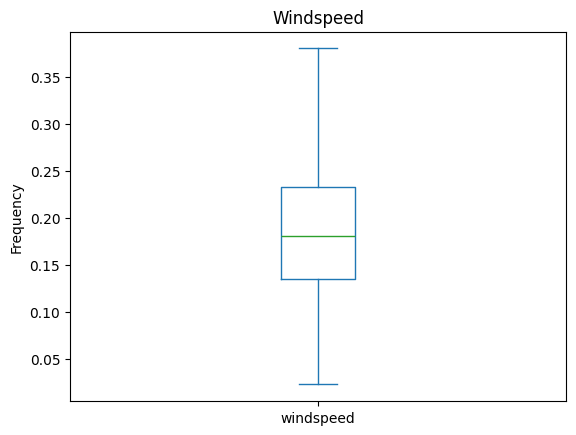

In [13]:
new_bike_sharing_df_cap["windspeed"].plot.box()
plt.title("Windspeed")
plt.ylabel("Frequency")

## Visualization and Feature Selection
Melakukan visualisasi dan menseleksi fitur yang telah didapatkah pada proses EDA. Visualisasi berupa scatter plot untuk melihat hubungan antara fitur "temp" dan "windspeed" terhadap "cnt".

In [14]:
# Selecting "temp" and "windspeed" as a feature for the model
dataFeature = new_bike_sharing_df_cap.iloc[:, 10:12]
dataFeature.head()

,temp,windspeed
0,0.344167,0.160446
1,0.344167,0.160446
2,0.344167,0.160446
3,0.344167,0.160446
4,0.344167,0.160446


In [15]:
# Define dataset for KNN
newDataFrame = new_bike_sharing_df_cap[["temp", "windspeed", "cnt"]].copy()
newDataFrame.head()

# Re-arrange dataset
columns = newDataFrame.columns.tolist()
columns.insert(0, columns.pop(columns.index("cnt")))
newDataFrame = newDataFrame[columns]

newDataFrame.head()

,cnt,temp,windspeed
0,985,0.344167,0.160446
1,985,0.344167,0.160446
2,985,0.344167,0.160446
3,985,0.344167,0.160446
4,985,0.344167,0.160446


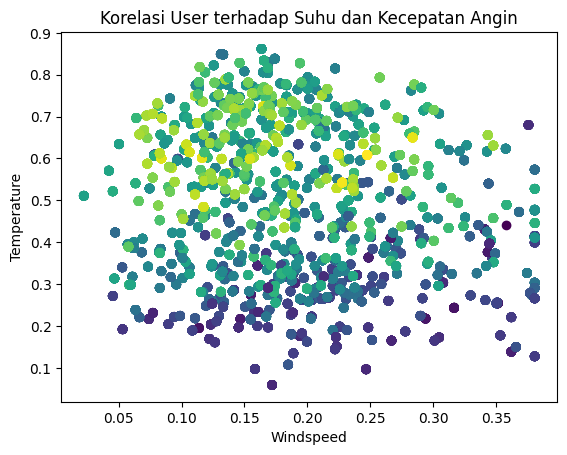

In [16]:
# Plotting the feature with respect of Total User
plt.scatter(newDataFrame["windspeed"], newDataFrame["temp"], c=newDataFrame["cnt"])
plt.title("Korelasi User terhadap Suhu dan Kecepatan Angin")
plt.xlabel("Windspeed")
plt.ylabel("Temperature")
plt.show()

## Data Labelling
Melakukan proses labelling untuk memisahkan data "cnt" menjadi beberapa kelas untuk kebutuhan klasifikasi pada model KNN.

In [17]:
# Label Encoding for "cnt"
newDataFrame_labelled = newDataFrame.copy()
newDataFrame_labelled["Category"] = pd.cut(newDataFrame_labelled["cnt"], bins=5, labels=["low", "medium", "high", "very high", "extreme"])

# Re Arrange Dataset
columns = newDataFrame_labelled.columns.tolist()
columns.insert(1, columns.pop(columns.index("Category")))
newDataFrame_labelled = newDataFrame_labelled[columns]

newDataFrame_labelled.head()

,cnt,Category,temp,windspeed
0,985,low,0.344167,0.160446
1,985,low,0.344167,0.160446
2,985,low,0.344167,0.160446
3,985,low,0.344167,0.160446
4,985,low,0.344167,0.160446


## Normalization
Melakukan scaling dataset baru yang telah digabungkan dengan fiturnya dengan metode Min-Max Scaler. Min-Max Scaler merupakan fungsi yang digunakan untuk membuat range rata 0-1. Berikut untuk model matematika dari Min-Max Scaler :

$
\begin{align}
x' = \frac{x - min(x)}{max(x) - min(x)}
\end{align}
$

In [18]:
# Normalization with Min-Max Scaler
newDataFrame_scaled = newDataFrame_labelled.copy()
normalized_columns = ["cnt", "temp", "windspeed"]

for column in normalized_columns:
    newDataFrame_scaled[column] = (newDataFrame_scaled[column] - newDataFrame_scaled[column].min()) / (newDataFrame_scaled[column].max() - newDataFrame_scaled[column].min())

newDataFrame_scaled.head()

,cnt,Category,temp,windspeed
0,0.110792,low,0.35517,0.385418
1,0.110792,low,0.35517,0.385418
2,0.110792,low,0.35517,0.385418
3,0.110792,low,0.35517,0.385418
4,0.110792,low,0.35517,0.385418


## Train Test Split
Menggunakan train test split untuk memisahkan data testing serta data training dari dataset. Hal ini digunakan untuk membagi learning ke dataset dengan proporsi yang sesuai dan menghindari kemungkinan adanya underfitting.

In [19]:
# Train Test Split Function
def train_test_split(X, y, test_size=0.2):
    n = len(X)
    indices = np.random.permutation(n)
    test_size = int(n * test_size)
    test_indices, train_indices = indices[:test_size], indices[test_size:]
    X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
    y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]

    return X_train, X_test, y_train, y_test

In [20]:
# Split X and y for feature and output
X = newDataFrame_scaled.drop(columns=["Category"])
y = newDataFrame_scaled["Category"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

y.head()


0    low
1    low
2    low
3    low
4    low
Name: Category, dtype: category
Categories (5, object): ['low' < 'medium' < 'high' < 'very high' < 'extreme']

## Machine Learning Model
### KNN Algorithm

### **Minkowski Distance**

$$
\text{Minkowski Distance} =
D(X, Y) = \left( \sum_{i=1}^{n} |x_i - y_i|^p \right)^{\frac{1}{p}}
$$

### **Euclidean Distance**

$$
\text{Euclidean Distance} =
D(X, Y) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}
$$

### **Manhattan Distance**

\begin{align}
&\text{Manhattan Distance} =
D(X, Y) = \sum_{i=1}^{n} |x_i - y_i|\\
\end{align}

In [21]:
from concurrent.futures import ThreadPoolExecutor

class KNN:
    def __init__(self, n_neighbors=3, p=2):
        self.n_neighbors = n_neighbors
        self.p = p
        self.X_train = None
        self.y_train = None
        self.label_to_num = {}
        self.num_to_label = {}

    def fit(self, X_train, y_train):
        X_train = X_train.apply(pd.to_numeric, errors='coerce').fillna(0).astype(float)
        self.X_train = X_train.to_numpy()
        unique_labels = y_train.unique()
        self.label_to_num = {label: idx for idx, label in enumerate(unique_labels)}
        self.num_to_label = {idx: label for idx, label in enumerate(unique_labels)}
        self.y_train = y_train.map(self.label_to_num).to_numpy()

    def get_distance_matrix(self, X_test):
        X_test = X_test.apply(pd.to_numeric, errors='coerce').fillna(0).astype(float).to_numpy()
        if self.p == 2:
            dists = np.sqrt(((X_test[:, np.newaxis] - self.X_train) ** 2).sum(axis=2))
        elif self.p == 1:
            dists = np.abs(X_test[:, np.newaxis] - self.X_train).sum(axis=2)
        else:
            dists = (np.abs(X_test[:, np.newaxis] - self.X_train) ** self.p).sum(axis=2) ** (1 / self.p)
        return dists

    def predict(self, X_test):
        dists = self.get_distance_matrix(X_test)
        nearest_neighbors = np.argsort(dists, axis=1)[:, :self.n_neighbors]
        y_nearest_labels = self.y_train[nearest_neighbors]
        predictions = [np.bincount(row).argmax() for row in y_nearest_labels]
        return [self.num_to_label[pred] for pred in predictions]

    def evaluate(self, X_test, y_test):
        y_test_encoded = y_test.map(self.label_to_num).astype(int)
        y_pred_encoded = [self.label_to_num[pred] for pred in self.predict(X_test)]

        def calculate_cross_entropy(y_true, y_pred):
            num_classes = len(self.label_to_num)
            y_true_one_hot = np.eye(num_classes)[y_true]
            y_pred_one_hot = np.eye(num_classes)[y_pred]
            epsilon = 1e-10
            cross_entropy = -np.sum(y_true_one_hot * np.log(y_pred_one_hot + epsilon)) / len(y_true)
            return cross_entropy

        def calculate_accuracy(y_true, y_pred):
            return np.mean((y_true == y_pred).astype(int)) * 100

        with ThreadPoolExecutor() as executor:
            future_cross_entropy = executor.submit(calculate_cross_entropy, y_test_encoded, y_pred_encoded)
            future_accuracy = executor.submit(calculate_accuracy, y_test_encoded, y_pred_encoded)
            cross_entropy_loss = future_cross_entropy.result()
            accuracy = future_accuracy.result()

        print("Cross-Entropy Loss:", cross_entropy_loss)
        print(f"Accuracy: {accuracy:.2f}%")

        print("\nPredicted vs Actual Values:")
        for pred, actual in zip(self.predict(X_test)[:5], y_test[:5]):
            print(f"Predicted: {pred}, Actual: {actual}")

        # Calculate and display the confusion matrix
        self.plot_confusion_matrix(y_test_encoded, y_pred_encoded, class_names=list(self.label_to_num.keys()))

    @staticmethod
    def calculate_confusion_matrix(y_true, y_pred, num_classes):
        cm = np.zeros((num_classes, num_classes), dtype=int)
        for true, pred in zip(y_true, y_pred):
            cm[true][pred] += 1
        return cm

    def plot_confusion_matrix(self, y_true, y_pred, class_names):
        num_classes = len(class_names)
        cm = self.calculate_confusion_matrix(y_true, y_pred, num_classes)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
        plt.xlabel("Predicted Labels")
        plt.ylabel("True Labels")
        plt.title("Confusion Matrix")
        plt.show()



### Accuracy

\begin{align}
&\text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}} = \frac{\sum_{i=1}^{n} \mathbb{1}(\hat{y}_i = y_i)}{n} \times 100
\end{align}


### Cross Entropy
$$
\text{Binary Cross-Entropy} = -\frac{1}{N} \sum_{i=1}^{N} \left( y_i \cdot \log(\hat{y}_i) + (1 - y_i) \cdot \log(1 - \hat{y}_i) \right)
$$

## Evaluation Metric
Membuat metrik evaluasi untuk problem klafisikasi dari KNN. Metrik evaluasi yang digunakan untuk problem klasifikasi adalah *Confusion Matrix*. Dari *Confusion Matrix* tersebut, terdapat perhitungan akurasi, presisi, recall, dan F1-Score.

$
\begin{align}
Accuracy = \frac{TP + TN}{(TP + TN + + FP + FN)}
\end{align}
$

$
\begin{align}
Precision = \frac{TP}{TP + FP}
\end{align}
$

$
\begin{align}
Recall = \frac{TP}{FP + FN}  
\end{align}
$

$
\begin{align}
F1 - Score = \frac{2*Precision*Recall}{Precision + Recall}
\end{align}
$

Cross-Entropy Loss: -1.0000000826903709e-10
Accuracy: 100.00%

Predicted vs Actual Values:
Predicted: high, Actual: high
Predicted: high, Actual: high
Predicted: medium, Actual: medium
Predicted: high, Actual: high
Predicted: medium, Actual: medium


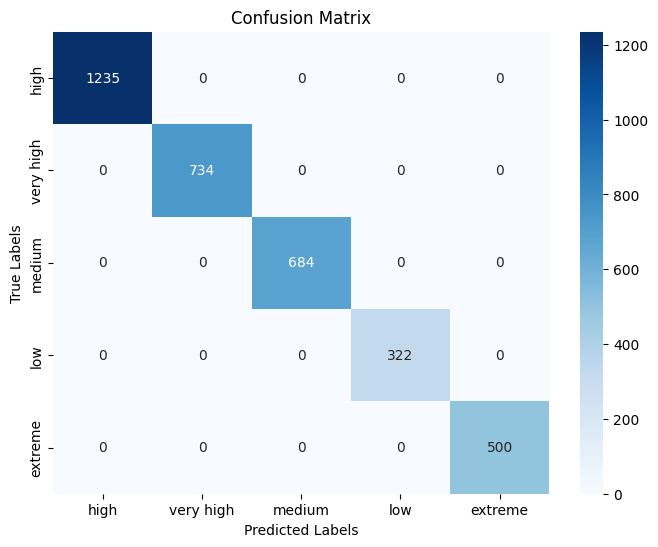

In [ ]:
# Mendefinisikan KNN Model
knn = KNN(n_neighbors=3, p=2)

# Melakukan fitting pada data training
knn.fit(X_train, y_train) 

# Mengevaluasi model dengan data uji
knn.evaluate(X_test, y_test)

# Conclusion
